### importing libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mplsoccer import Sbopen, Pitch

#### statsbomb open data object

In [2]:
parser = Sbopen()

#### event data

In [3]:
# match id = 69301 : england vs sweden
df_event, df_related, df_freeze, df_tactics = parser.event(69301)

In [4]:
df_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3289 entries, 0 to 3288
Data columns (total 73 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3289 non-null   object 
 1   index                           3289 non-null   int64  
 2   period                          3289 non-null   int64  
 3   timestamp                       3289 non-null   object 
 4   minute                          3289 non-null   int64  
 5   second                          3289 non-null   int64  
 6   possession                      3289 non-null   int64  
 7   duration                        2457 non-null   float64
 8   match_id                        3289 non-null   int64  
 9   type_id                         3289 non-null   int64  
 10  type_name                       3289 non-null   object 
 11  possession_team_id              3289 non-null   int64  
 12  possession_team_name            32

In [5]:
df_event.head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,dribble_overrun,block_deflection,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name
0,080231d5-1070-4484-b6f6-d73ec50c7fc0,1,1,00:00:00,0,0,1,0.00000,69301,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a29f6be5-aae4-431f-9741-ac6792f51007,2,1,00:00:00,0,0,1,0.00000,69301,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,52d31509-0385-4d88-9877-14afe3cb43a9,3,1,00:00:00,0,0,1,0.00000,69301,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e08133a4-d370-42b7-977b-251effa1ed40,4,1,00:00:00,0,0,1,0.00000,69301,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8d5673e4-0d1b-48a1-8945-38f7ea98c548,5,1,00:00:00,0,0,2,0.16873,69301,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### event types

In [6]:
type_names = df_event['type_name'].unique()
for event_types in type_names:
    print(event_types)

Starting XI
Half Start
Pass
Ball Receipt
Carry
Pressure
Ball Recovery
Clearance
Block
Dispossessed
Duel
Dribbled Past
Dribble
Interception
Goal Keeper
Miscontrol
Foul Committed
Foul Won
Injury Stoppage
Error
Shot
Substitution
Half End
Tactical Shift
Bad Behaviour


#### england vs sweden

In [7]:
for team in df_event.team_name.unique():
    print(team)

England Women's
Sweden Women's


#### england subs

In [8]:
eng_subs = df_event.loc[df_event.type_name == 'Substitution'].loc[df_event.team_name == "England Women's"]
eng_subs

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,dribble_overrun,block_deflection,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name
1762,58183ffc-8e69-474a-995d-c4cea3dc9d32,1763,2,00:04:23,49,23,99,0.0,69301,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2610,99762551-5c6d-43f5-a918-8f64afc5564c,2611,2,00:28:50,73,50,150,0.0,69301,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2962,d37fb2b3-b7ff-47e8-ae6a-6fa205a1017b,2963,2,00:37:32,82,32,167,0.0,69301,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Index of first england substitution

In [9]:
eng_sub_1 = eng_subs.iloc[0]['index']
eng_sub_1

1763

#### all possible outcomes of any event

In [10]:
for outcome in df_event.outcome_name.unique():
    print(outcome)

nan
Incomplete
Lost In Play
Success In Play
Complete
Success
Success Out
Out
Goal
Touched In
Won
Pass Offside
Saved to Post
In Play Danger
Unknown
No Touch
In Play Safe
Saved
Touched Out
Injury Clearance
Lost Out
Tactical
Off T
Blocked
Claim
Wayward
Saved Twice
Injury
Collected Twice


#### all possible sub-event types

In [11]:
for event_subtype in df_event.sub_type_name.unique():
    print(event_subtype)

nan
Kick Off
Throw-in
Tackle
Recovery
Corner
Collected
Goal Kick
Free Kick
Open Play
Goal Conceded
Shot Saved to Post
Aerial Lost
Punch
Shot Saved
Handball
Shot Faced
Keeper Sweeper


## Pass

### 1. outcomes of an attempted pass

In [12]:
passes = df_event[df_event.type_name == 'Pass']
for pass_outcome in passes.outcome_name.unique():
    print(pass_outcome)

nan
Incomplete
Out
Pass Offside
Unknown
Injury Clearance


###### OBSERVATION : nan represents the pass which is non-faulty and thus successful

### 2. sub event types of an attempted pass

In [13]:
for pass_subtype in passes.sub_type_name.unique():
    print(pass_subtype)

Kick Off
nan
Throw-in
Recovery
Corner
Goal Kick
Free Kick


#### Required data for plotting passing networks

In [14]:
mask_eng = (df_event.type_name == 'Pass') & (df_event.team_name == "England Women's") & (df_event.index < eng_sub_1) & (df_event.outcome_name.isnull()) & (df_event.sub_type_name != 'Throw-in')
pass_eng = df_event.loc[mask_eng, ['x', 'y', 'end_x', 'end_y', 'player_name', 'pass_recipient_name']]
pass_eng['player_name'] = pass_eng['player_name'].apply(lambda x: str(x).split()[-1])
pass_eng['pass_recipient_name'] = pass_eng['pass_recipient_name'].apply(lambda x: str(x).split()[-1])
pass_eng.head()

,x,y,end_x,end_y,player_name,pass_recipient_name
4,60.0,40.0,61.9,40.9,White,Kirby
8,82.6,37.6,78.4,58.5,Kirby,Bronze
11,84.7,65.3,98.9,77.9,Bronze,Parris
14,94.7,75.5,93.3,64.3,Parris,Scott
63,5.2,8.3,10.8,5.5,Moore,Mead


#### calculating vertices location and size to represent each player

In [22]:
vertices_eng = pd.DataFrame()
for i, name in enumerate(pass_eng['player_name'].unique()):
    passx = pass_eng.loc[pass_eng.player_name == name]['x'].to_numpy()
    recx = pass_eng.loc[pass_eng.pass_recipient_name == name]['x'].to_numpy()
    passy = pass_eng.loc[pass_eng.player_name == name]['y'].to_numpy()
    recy = pass_eng.loc[pass_eng.pass_recipient_name == name]['y'].to_numpy()
    vertices_eng.at[i, 'player_name'] = name
    vertices_eng.at[i, 'x'] = np.mean(np.concatenate([passx, recx]))
    vertices_eng.at[i, 'y'] = np.mean(np.concatenate([passy, recy]))
    vertices_eng.at[i, 'total_pass'] = pass_eng.loc[pass_eng.player_name == name].count().iloc[0]

vertices_eng['vertex_size'] = (vertices_eng['total_pass']/vertices_eng['total_pass'].max() * 1500)
vertices_eng

,player_name,x,y,total_pass,vertex_size
0,White,74.417647,48.776471,10.0,441.176471
1,Kirby,49.166071,42.526786,26.0,1147.058824
2,Bronze,47.329688,62.420313,32.0,1411.764706
3,Parris,68.765714,64.008571,15.0,661.764706
4,Moore,55.668000,37.920000,14.0,617.647059
5,Mead,57.900000,20.233333,14.0,617.647059
6,Greenwood,51.834615,19.290385,22.0,970.588235
7,Telford,11.900000,36.756250,12.0,529.411765
8,McManus,39.859375,34.846875,34.0,1500.000000
9,Scott,48.441176,53.747059,16.0,705.882353


#### calculating edge width between vertices to represent number of player passes between them

In [23]:
pass_eng['pass_pair'] = pass_eng.apply(lambda x: '_'.join(sorted([x['player_name'], x['pass_recipient_name']])), axis=1)
edges_eng = pass_eng.groupby(['pass_pair']).x.count().reset_index()
edges_eng.rename({'x':'pass_count'}, axis='columns', inplace=True)
edges_eng

,pass_pair,pass_count
0,Bronze_Houghton,16
1,Bronze_Kirby,9
2,Bronze_McManus,4
3,Bronze_Mead,1
4,Bronze_Moore,4
5,Bronze_Parris,16
6,Bronze_Scott,11
7,Bronze_White,3
8,Greenwood_Houghton,1
9,Greenwood_Kirby,6


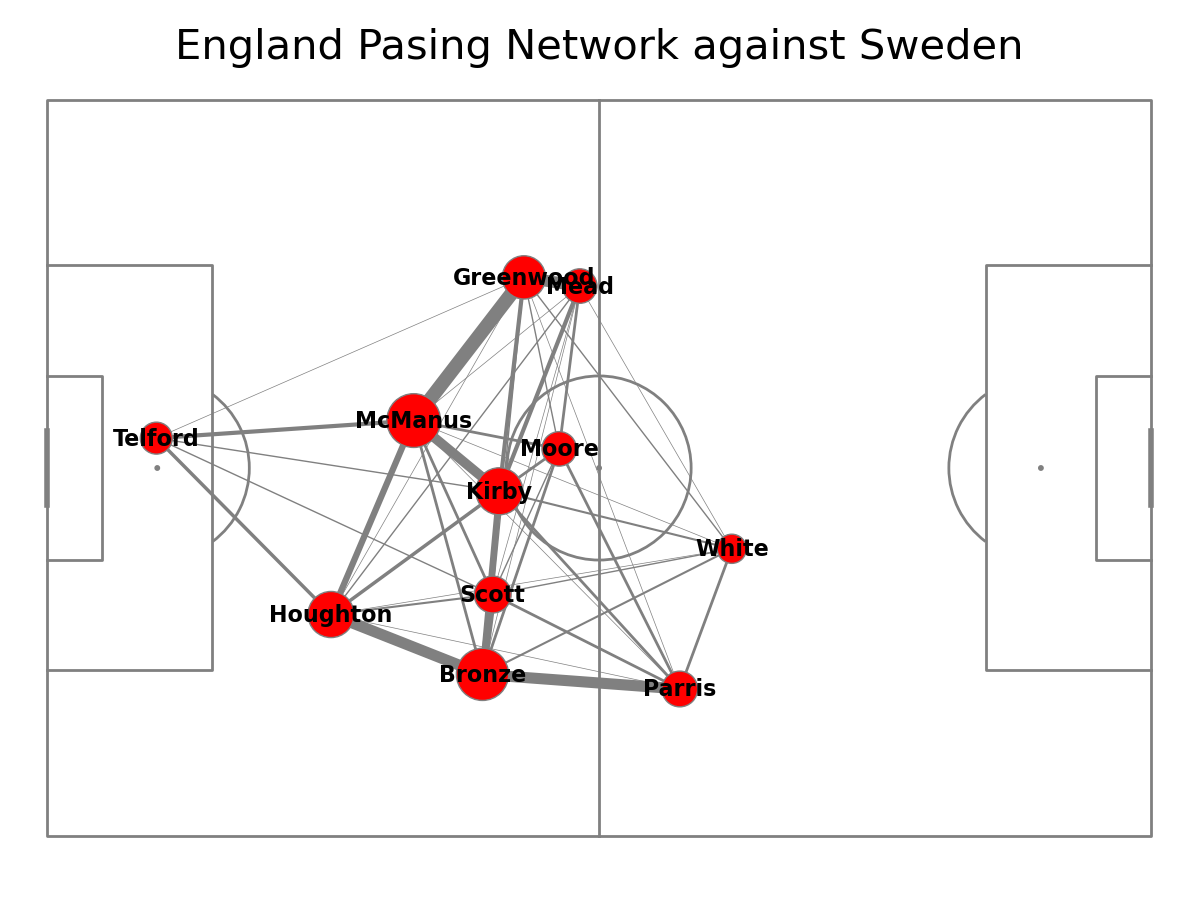

In [36]:
pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, endnote_height=0.04, title_space=0, endnote_space=0, axis=False)
pitch.scatter(vertices_eng.x, vertices_eng.y, s=vertices_eng.vertex_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax['pitch'], zorder=3)
for i, row in vertices_eng.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight='bold', size=16, ax=ax['pitch'], zorder=4)
    
for i, row in edges_eng.iterrows():
    player1 = row['pass_pair'].split('_')[0]
    player2 = row['pass_pair'].split('_')[1]
    player1_x = vertices_eng.loc[vertices_eng['player_name'] == player1]['x'].iloc[0]
    player1_y = vertices_eng.loc[vertices_eng['player_name'] == player1]['y'].iloc[0]
    player2_x = vertices_eng.loc[vertices_eng['player_name'] == player2]['x'].iloc[0]
    player2_y = vertices_eng.loc[vertices_eng['player_name'] == player2]['y'].iloc[0]
    num_passes = row['pass_count']
    line_width = (num_passes/edges_eng['pass_count'].max() * 10)
    pitch.lines(player1_x, player1_y, player2_x, player2_y, alpha=1, lw=line_width, zorder=2, color='grey', ax=ax['pitch'])

fig.suptitle('England Pasing Network against Sweden', fontsize=30)
plt.show()

#### centralisation measure

In [35]:
no_passes = pass_eng.groupby(['player_name']).x.count().reset_index()
no_passes.rename({'x':'pass_count'}, axis='columns', inplace=True)
pass_max = no_passes.pass_count.max()
denominator = no_passes.pass_count.sum()*10
numerator = (pass_max-no_passes.pass_count).sum()
centralisation_index = numerator/denominator
print('centralisation index is : ', centralisation_index)

centralisation index is :  0.07
